In [50]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 14]

In [2]:
#Opening the experiment json
def load_probe_metric_list(fname):
    with open(fname,"r") as rhandle:
        probe_metric_list = json.load(rhandle)
    
    #Converting the metric into usable format
    pdict = defaultdict(list)
    for idx in range(len(probe_metric_list)):
        pdict["angle:m-t0"].append(probe_metric_list[idx]["conv_angle_dict"]["main"]["topic0"])
        pdict["angle:m-t1"].append(probe_metric_list[idx]["conv_angle_dict"]["main"]["topic1"])
        pdict["angle:t0-t1"].append(probe_metric_list[idx]["conv_angle_dict"]["topic0"]["topic1"])
        pdict["acc:main"].append(probe_metric_list[idx]["classifier_acc_dict"]["main"])
        pdict["acc:topic0"].append(probe_metric_list[idx]["classifier_acc_dict"]["topic0"])
        pdict["acc:topic1"].append(probe_metric_list[idx]["classifier_acc_dict"]["topic1"])
    return pdict

In [56]:
#Collecting multiple runs of experiment
def aggregate_random_runs(rdict_list):
    '''
    '''
    rdict_agg_list = defaultdict(list)
    for rdict in rdict_list:
        for key,val in rdict.items():
            rdict_agg_list[key]+=val
    
    #Now taking the mean of the experiments
    rdict_agg = defaultdict(list)
    for key,val in rdict_agg_list.items():
        rdict_agg[key] = dict(
                            mean = np.mean(val),
                            std  = np.std(val)
        )
    
    return rdict_agg

def get_all_result_dict(num_runs,pval_list):
    all_result_dict = {}
    for pidx,pval in enumerate(pval_list):
        prdict_list = []
        for nidx in range(num_runs):
            fname = "nlp_logs/pt.rel.{}.{}/probe_metric_list.json".format(nidx,pidx)
            prdict = load_probe_metric_list(fname)
            prdict_list.append(prdict)
        #Getting the aggregate result
        prdict_agg = aggregate_random_runs(prdict_list)
        all_result_dict[pval] = prdict_agg

    return all_result_dict

def plot_all_results(pval_list,all_result_dict,plot_item_list):
    '''
    '''
    fig,ax = plt.subplots(len(plot_item_list),)
    for iidx,item_name in enumerate(plot_item_list):
        #Colletcing the metrics
        yval = [all_result_dict[pval][item_name]["mean"] for pval in pval_list]
        yerr = [all_result_dict[pval][item_name]["std"] for pval in pval_list]
        #Plotting the guy
        ax[iidx].errorbar(pval_list,yval,yerr,ls="-.",marker="o",label=item_name)
#         ax[iidx].set_ylim(0.0,1.0)
        ax[iidx].set_xlabel("correlation value [0.5,1]")
        ax[iidx].set_ylabel("convergence angle")
        ax[iidx].legend()
        ax[iidx].grid(True)
    plt.show()

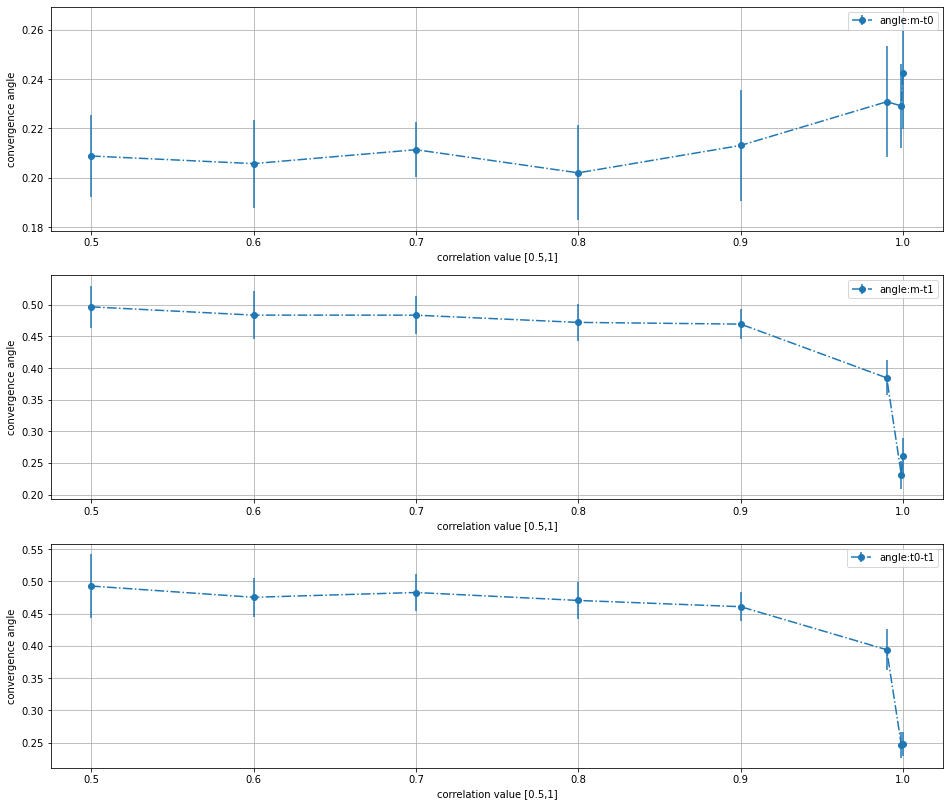

In [57]:
#Aggregating all the runs
num_runs=10
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99,0.999,0.9999]
all_result_dict = get_all_result_dict(num_runs,pval_list)
plot_item_list = [
                    "angle:m-t0",
                    "angle:m-t1",
                    "angle:t0-t1"
]
plot_all_results(pval_list,all_result_dict,plot_item_list)


'''
Observations:
1. Why is the angle difference between the main and t0.
2. Why lower correlation regimens dont have much convergence angle?
    2.1 Is it because of large number of training epoch? What is the effect of epcoh number
'''